<a href="https://colab.research.google.com/github/18wh1a1234/WiseML/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
data = pd.read_csv("/content/pima-indians-diabetes.csv")

In [32]:
data.shape

(767, 9)

In [33]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
data.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
data

,A,B,C,D,E,F,G,H,I
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


#### Extracting features and labels separately

In [36]:
featurenames = ['B', 'C', 'D', 'E', 'F', 'G', 'H']
# separating features
features = data.loc[:,featurenames]

# separating target
labels = data.loc[:,'I']

#### Standardising features

In [37]:
features = StandardScaler().fit_transform(features)

In [38]:
print(features)

[[-1.12208597 -0.16024856  0.53202348 ... -0.68372895 -0.36426474
  -0.18894038]
 [ 1.94447577 -0.26357823 -1.28688187 ... -1.10230105  0.60470064
  -0.1037951 ]
 [-0.99692019 -0.16024856  0.15569823 ... -0.49346891 -0.91968415
  -1.0403932 ]
 ...
 [ 0.0044061   0.14974046  0.15569823 ... -0.73446496 -0.68423462
  -0.27408566]
 [ 0.16086333 -0.47023757 -1.28688187 ... -0.23978884 -0.37030191
   1.17338414]
 [-0.8717544   0.04641078  0.65746522 ... -0.20173684 -0.47293375
  -0.87010264]]


#### Reducing 4D to 2D

In [39]:
import numpy as np
pca = PCA(n_components=2)

pct = pca.fit_transform(features)

print(np.cumsum(pca.explained_variance_ratio_))
principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])
display(principal_df)
finaldf = pd.concat([principal_df,labels],axis=1)

[0.29757116 0.48627465]


,pc1,pc2
0,-0.983636,-0.591727
1,-0.642926,1.205277
2,-0.910494,-1.151015
3,2.662748,-1.505515
4,-1.539512,0.621912
...,...,...
762,1.210120,0.919828
763,0.005672,-0.330752
764,-0.310839,-0.173803
765,-1.102530,1.462216


In [40]:
print(principal_df)

          pc1       pc2
0   -0.983636 -0.591727
1   -0.642926  1.205277
2   -0.910494 -1.151015
3    2.662748 -1.505515
4   -1.539512  0.621912
..        ...       ...
762  1.210120  0.919828
763  0.005672 -0.330752
764 -0.310839 -0.173803
765 -1.102530  1.462216
766 -0.651644 -0.973910

[767 rows x 2 columns]


In [41]:
display(finaldf)

,pc1,pc2,I
0,-0.983636,-0.591727,0
1,-0.642926,1.205277,1
2,-0.910494,-1.151015,0
3,2.662748,-1.505515,1
4,-1.539512,0.621912,0
...,...,...,...
762,1.210120,0.919828,0
763,0.005672,-0.330752,0
764,-0.310839,-0.173803,0
765,-1.102530,1.462216,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


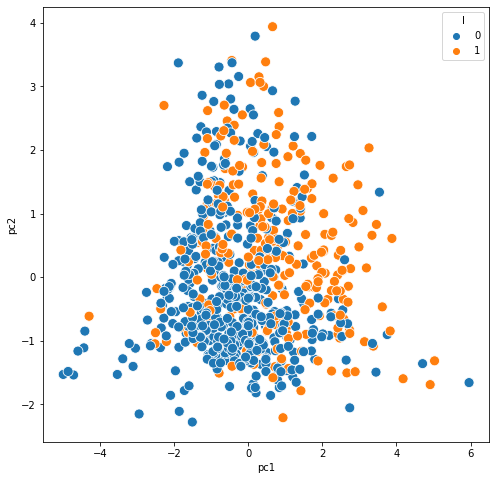

In [42]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.scatterplot('pc1', 'pc2', hue='I', data=finaldf, s=100)
plt.show()

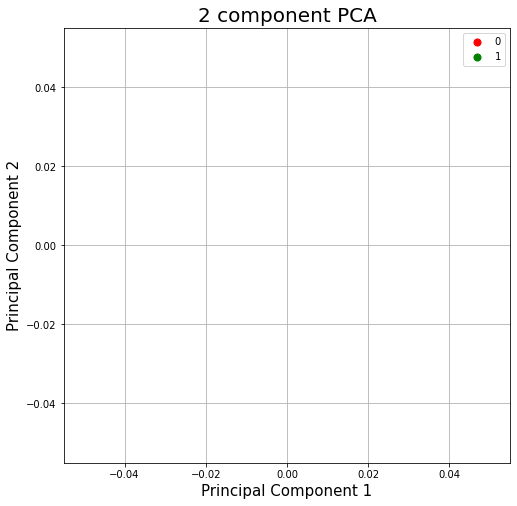

In [43]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = labels == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = finaldf[['pc1', 'pc2']]
label = finaldf['I']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.35, random_state=42, shuffle=True)
model = LogisticRegression()

model.fit(x_train, y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Train Accuracy: {accuracy_score(y_train, train_pred)*100:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred)*100:.2f}")

Train Accuracy: 73.29
Test Accuracy: 71.38


In [46]:
x_train.shape

(498, 2)

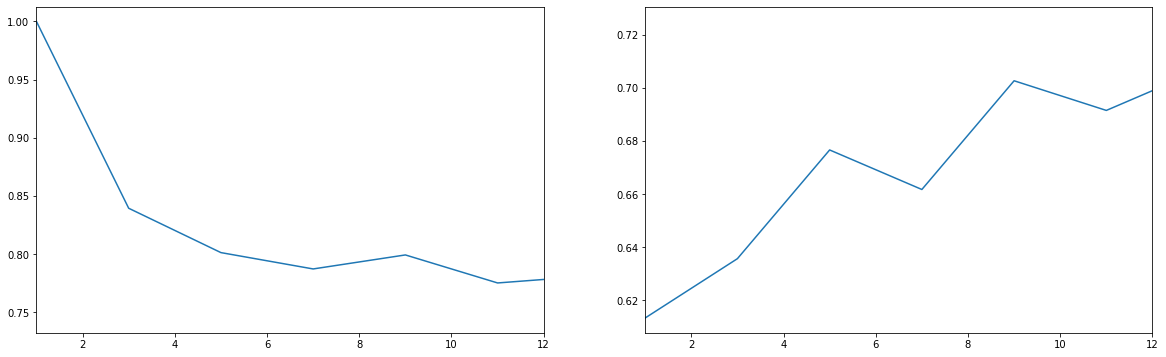

In [47]:
from sklearn.neighbors import KNeighborsClassifier

train_acc = []
test_acc = []
k_range = list(range(1, 90, 2)) 

for k in k_range:
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.plot(k_range, train_acc)
plt.xlim(1, 12)
plt.subplot(122)
plt.plot(k_range, test_acc)
plt.xlim(1, 12)
plt.show()

In [48]:
model = KNeighborsClassifier(11)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)*100:.2f}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)*100:.2f}")

Train accuracy: 77.51
Test accuracy: 69.14
